# 1) Principal components analysis (PCA) algorithm
I've generated several random datasets for you to use PCA on.

In [ ]:
import numpy as np

np.random.seed(1)

# import your other modules here as you need them

In [ ]:
# 100D uniform distribution over the [0, 1] hypercube
X1 = np.random.random((10000, 100)) # 10000 samples, 100 dimensions

# 2D normal distribution with few samples 
X2 = np.random.multivariate_normal(np.array([-1, 5]), np.array([[1, 2], [2, 8]]), size=20) # 20 samples, 2 dimensions

# 3D normal distribution with lots of samples
X3 = np.random.multivariate_normal(np.array([7, 3, 5]), np.array([[1, 2, 0], [2, 0.5, 0.7], [0, 0.7, 0.1]]), size=1000) # 1000 samples, 3 dimensions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


For each dataset (`X1`, `X2`, `X3`):

* If the initial dataset is 1D, 2D, or 3D, generate a scatterplot of the initial dataset (refer to problem set 2 for some 3D plotting examples). 

* Then, use scikit-learn and perform PCA with `k` equal to the dimension of the dataset you are working with (`k=d`). For this value of `k=d`, make a Scree plot, which is a bar chart where each bar represents one principal component and the height of each bar is that component's percent of explained variance (see Youtube video in Canvas lecture module 3, or link [here](https://youtu.be/FgakZw6K1QQ), and see below). The heights should be decreasing and sum to 100% roughly (double-check and sort if necessary, though scikit-learn should do this for you). For this case where `k=d`, if your transformed dataset is 1D, 2D, or 3D, generate an additional scatterplot of the transformed dataset.

![sample Scree plot](https://lh3.googleusercontent.com/proxy/wlGVuuzFb1Amv4U70iY1FIbZCiaNwcYdolfixDWAOmOeR2OtZCGr3IGEzmROc6X7wsqL0lPNSlpXUhOrJEOQq4gV8-IPzvICKItE3OFLQaoFpZaKbham1zL2fTeeuZdSSFjDdFuSV6MV3N31JmRjDisulheJA3M4Os-FamfK-2vTpHfkHLUjYYt7_Cbgt5OncawcoQjhnVsiL2dH3XVQrJcb)

* Now, as a machine learning practitioner, you should review the Scree plot to see how many of the top-`k` principal components to keep so that you have the desired total percent of explained variance in your lower-dimensional dataset (*this is up to you*). Feel free to try many different values of `k` and include your explorations in your notebook. If you explore `k`s equal to 1, 2, or 3 principal components to keep, then generate a plot of the transformed data.

In [ ]:
import matplotlib.pyplot as plt

#Re-centering the datasets
X1 -= np.mean(X1, axis=0)
X2 -= np.mean(X2, axis=0)
X3 -= np.mean(X3, axis=0)


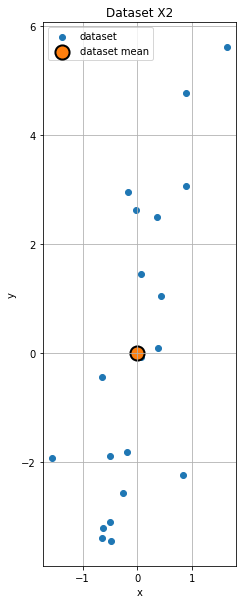

In [ ]:
#Plotting dataset for X2
fig = plt.figure(figsize=(10,10))

ax = fig.gca()
ax.set_aspect('equal')

plt.scatter(X2[:,0], X2[:,1], marker='o', label="dataset")
plt.scatter(np.mean(X2[:,0]), np.mean(X2[:,1]), marker='o', s=200, edgecolors='k', linewidths=2, label="dataset mean")

plt.xlabel("x")
plt.ylabel("y")
plt.title('Dataset X2')
plt.legend()
plt.grid()

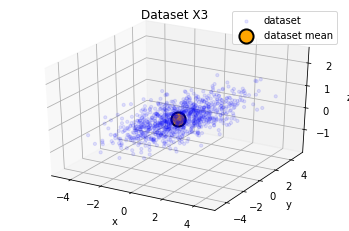

In [ ]:
#Plotting dataset for X3
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
xdata = X3[:,0]
ydata = X3[:,1]
zdata = X3[:,2]
ax.scatter3D(xdata, ydata, zdata, marker = 'o', s=10, c='b', label = "dataset", alpha=0.1)
ax.scatter3D(np.mean(X3[:,0]), np.mean(X3[:,1]), np.mean(X3[:,2]), marker='o', s=200, c='orange', edgecolors='k', linewidths=2, label="dataset mean")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Dataset X3")
plt.legend()

Text(0, 0.5, 'Ratio')

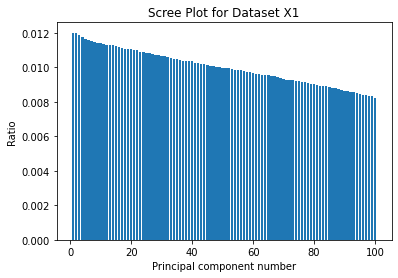

In [ ]:
#Scree plot for X1
from sklearn.decomposition import PCA
k = 100

model_1 = PCA(n_components=100)
model_1.fit(X1)

plt.bar(np.arange(1,101,1),model_1.explained_variance_ratio_)
plt.title("Scree Plot for Dataset X1")
plt.xlabel("Principal component number")
plt.ylabel("Ratio")

Text(0, 0.5, 'Ratio')

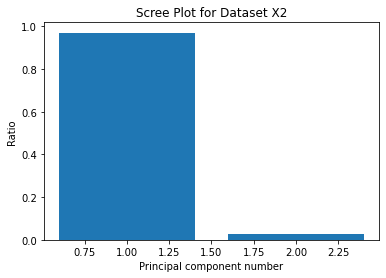

In [ ]:
#Scree plot for X2
k = 2

model_2 = PCA(n_components=k)
model_2.fit(X2)

plt.bar(np.arange(1,3,1),model_2.explained_variance_ratio_)
plt.title("Scree Plot for Dataset X2")
plt.xlabel("Principal component number")
plt.ylabel("Ratio")

Text(0, 0.5, 'Ratio')

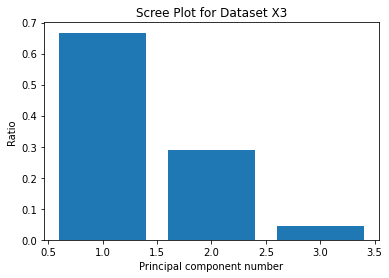

In [ ]:
#Scree plot for X3
k = 3

model_3 = PCA(n_components=k)
model_3.fit(X3)

plt.bar(np.arange(1,4,1),model_3.explained_variance_ratio_)
plt.title("Scree Plot for Dataset X3")
plt.xlabel("Principal component number")
plt.ylabel("Ratio")

In [ ]:
#Transforming all datasets
Xt_1 = model_1.transform(X1)
Xt_2 = model_2.transform(X2)
Xt_3 = model_3.transform(X3)

In [ ]:
#Retraining models for PCA to take place
model2 = PCA(n_components=1)
model2.fit(X2)

model3 = PCA(n_components=2)
model3.fit(X3)

#Transforming the datasets again
Xt2 = model2.transform(X2)
Xt3 = model3.transform(X3)

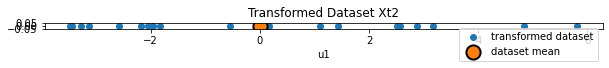

In [ ]:
#Plotting reduced dataset 'Xt2'
fig = plt.figure(figsize=(10,10))

ax = fig.gca()
ax.set_aspect('equal')

plt.scatter(Xt2[:,0], np.zeros(20), marker='o', label="transformed dataset")
plt.scatter(0, 0, marker='o', s=200, edgecolors='k', linewidths=2, label="dataset mean")

plt.xlabel("u1")
plt.title('Transformed Dataset Xt2')
plt.legend()

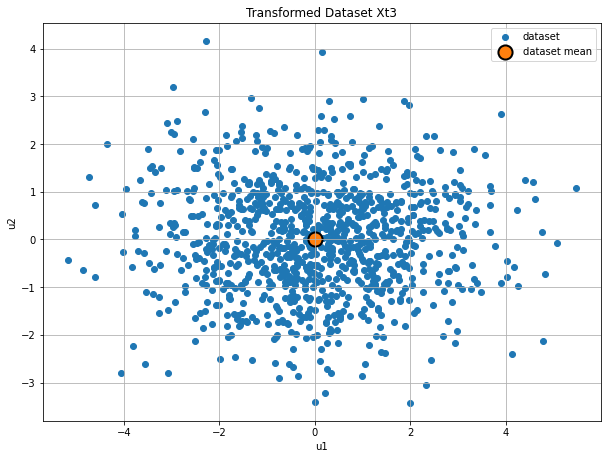

In [ ]:
#Plotting reduced dataset 'Xt3'
fig = plt.figure(figsize=(10,10))

ax = fig.gca()
ax.set_aspect('equal')

plt.scatter(Xt3[:,0], Xt3[:,1], marker='o', label="dataset")
plt.scatter(np.mean(Xt3[:,0]), np.mean(Xt3[:,1]), marker='o', s=200, edgecolors='k', linewidths=2, label="dataset mean")

plt.xlabel("u1")
plt.ylabel("u2")
plt.title('Transformed Dataset Xt3')
plt.legend()
plt.grid()

(Not required) As a challenge, after using scikit-learn to do PCA, you can try to implement PCA yourself using NumPy. We showed that one can easily re-center the dataset, compute the sample covariance matrix using `np.cov`, and retrieve the eigenvectors/principal components using `np.linalg.eig`. 

After you save only the top-`k` eigenvectors (corresponding to the `k`-largest eigenvalues), you need to normalize each eigenvector to have unit length. You can do this for a vector `u` by using computing `u_normalized = u/np.linalg.norm(u)`.

You can then loop over the dataset and project each example to the lower-dimensional subspace using something similar to `X_tilde[i, j] = np.dot(X[i, :], u[j, :])` where `i` iterates over the `n` training examples and `j` iterates over the `k` principal components. 

# Self implemented PCA:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


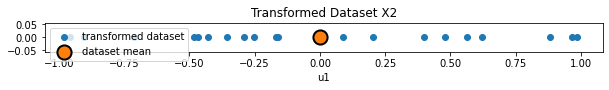

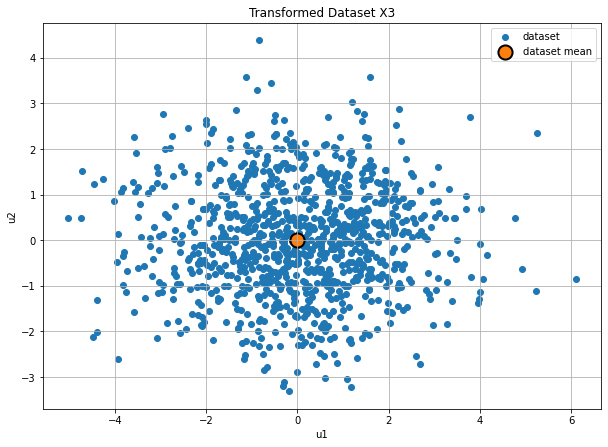

In [ ]:
### OPTIONAL IMPLEMENTATION OF PCA YOURSELF AND RE-RUNNING ON DATASETS

X2 = np.random.multivariate_normal(np.array([-1, 5]), np.array([[1, 2], [2, 8]]), size=20)

X3 = np.random.multivariate_normal(np.array([7, 3, 5]), np.array([[1, 2, 0], [2, 0.5, 0.7], [0, 0.7, 0.1]]), size=1000)

def PCA_alg(X, num_components):
    X = X - np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    evals, evecs = np.linalg.eig(cov_mat)
    variance_explained_ratio_ = []
    for i in evals:
      variance_explained_ratio_.append(i/sum(evals))
    pro_mat = (evecs.T[:][:num_components]).T
    X_pca = X @ pro_mat
    return X_pca

PCA_alg(X2, 1)

fig = plt.figure(figsize=(10,10))

ax = fig.gca()
ax.set_aspect('equal')

plt.scatter(PCA_alg(X2, 1)[:,0], np.zeros(20), marker='o', label="transformed dataset")
plt.scatter(0, 0, marker='o', s=200, edgecolors='k', linewidths=2, label="dataset mean")

plt.xlabel("u1")
plt.title('Transformed Dataset X2')
plt.legend()

PCA_alg(X3, 2)

fig = plt.figure(figsize=(10,10))

ax = fig.gca()
ax.set_aspect('equal')

plt.scatter(PCA_alg(X3, 2)[:,0], PCA_alg(X3, 2)[:,1], marker='o', label="dataset")
plt.scatter(np.mean(PCA_alg(X3, 2)[:,0]), np.mean(PCA_alg(X3, 2)[:,1]), marker='o', s=200, edgecolors='k', linewidths=2, label="dataset mean")

plt.xlabel("u1")
plt.ylabel("u2")
plt.title('Transformed Dataset X3')
plt.legend()
plt.grid()

# 2) Finding structure in breast cancer data

Below, we import a 30-dimensional dataset of breast cancer tumor measurements. (You don't need to worry about this code, but hopefully it is clear what it is doing.)

In [ ]:
from sklearn.datasets import load_breast_cancer

# load dataset
breast = load_breast_cancer()

breast_features = breast.feature_names  # names of each column in our dataset
breast_labels   = breast.target         # 0 if tumor is benign, 1 if tumor is malignant
breast_data     = breast.data           # our dataset matrix

Your first step may be to print out each of the things (and their shapes) that we generated in the previous cell to see what they look like.

In [ ]:
### EXPLORE DATA HERE (printouts, plots, etc., whatever you need to understand the data)

We'll add the labels to our sample matrix because later we might like to see how the label affects the structure we find.

In [ ]:
X = np.append(breast_data, breast_labels.reshape(-1, 1), axis=1)
X.shape

(569, 31)

Now, run PCA using scikit-learn, generate a Scree plot, justify your choice of the top-`k` principal components to keep, and visualize the dataset if you choose a `k` value of 1, 2, or 3. As a challenge, you might try to change the color of the scatterplot marker based on the label value using the same tricks we used to color things by cluster. You should think about the features that contribute most to each of the first two or three principal components by looking at the size of each of the elements in the given component and which feature they correspond to. Larger values indicate more importance.

Text(0, 0.5, 'Ratio')

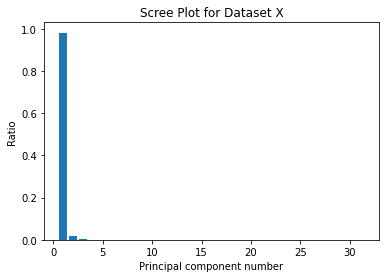

In [ ]:
#Performing PCA and creating Scree Plot
k = 31

model_a = PCA(n_components=k)
model_a.fit(X)

plt.bar(np.arange(1,32,1),model_a.explained_variance_ratio_)
plt.title("Scree Plot for Dataset X")
plt.xlabel("Principal component number")
plt.ylabel("Ratio")

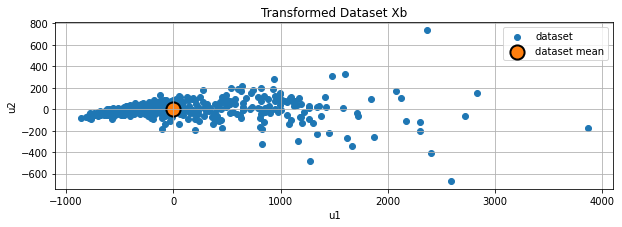

In [ ]:
X = model_a.transform(X)
#Creating model with 2 principal features chosen and transforming the dataset
model_b = PCA(n_components=2)
model_b.fit(X)
Xb = model_b.transform(X)

#Plotting the transformed dataset Xb
fig = plt.figure(figsize=(10,10))

ax = fig.gca()
ax.set_aspect('equal')

plt.scatter(Xb[:,0], Xb[:,1], marker='o', label="dataset")
plt.scatter(np.mean(Xb[:,0]), np.mean(Xb[:,1]), marker='o', s=200, edgecolors='k', linewidths=2, label="dataset mean")

plt.xlabel("u1")
plt.ylabel("u2")
plt.title('Transformed Dataset Xb')
plt.legend()
plt.grid()

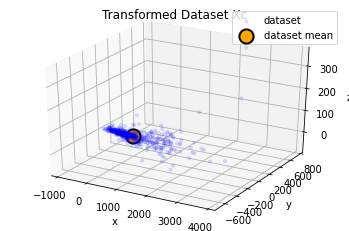

In [ ]:
#Trying with n_components=3 as well

#Creating model with 3 principal features chosen and transforming the dataset
model_c = PCA(n_components=3)
model_c.fit(X)
Xc = model_c.transform(X)

#Plotting the transformed dataset Xc
ax1 = plt.axes(projection='3d')
xdata = Xc[:,0]
ydata = Xc[:,1]
zdata = Xc[:,2]
ax1.scatter3D(xdata, ydata, zdata, marker = 'o', s=10, c='b', label = "dataset", alpha=0.1)
ax1.scatter3D(np.mean(Xc[:,0]), np.mean(Xc[:,1]), np.mean(Xc[:,2]), marker='o', s=200, c='orange', edgecolors='k', linewidths=2, label="dataset mean")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
plt.title("Transformed Dataset Xc")
plt.legend()

(Not required) You might try k-means clustering and the structure it uncovers as well. Remember that unsupervised learning is about finding insights in data, so we are not restricted to looking at just one algorithm.

In [ ]:
import pandas as pd
df = pd.DataFrame(X)
df1 = df[[0,1]]
df_temp = pd.DataFrame(breast_labels.reshape(-1, 1))
df_temp = df_temp.rename(columns={0:'label'})
df = pd.concat([df1, df_temp], axis=1)
Xn = df.to_numpy()

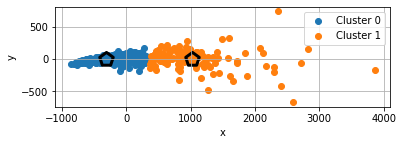

In [ ]:
from sklearn.cluster import KMeans as km
km_model = km(n_clusters=2)
km_model.fit(Xb)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_aspect('equal')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(2):
    plt.scatter(Xb[km_model.labels_==i,0],Xb[km_model.labels_==i,1],marker='o',color=colors[i],label=("Cluster %d" %(i)))
    plt.scatter(km_model.cluster_centers_[i,0],km_model.cluster_centers_[i,1], marker='p', edgecolors='black', linewidths=3, s=200, color=colors[i])

                
plt.xlabel('x')           
plt.ylabel('y')
plt.legend()
plt.grid()

In [ ]:
#Checking pre-defined labels with new ones
Xm = np.append(Xb, breast_labels.reshape(-1, 1), axis=1)
Xm[:,2]-Xn[:,2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.